<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Séries Temporais
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [228]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

### **1.1. Energia**

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [197]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [198]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [199]:
display(energia)

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084
...,...,...,...,...
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647


In [200]:
energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   referencia   204 non-null    datetime64[ns]
 1   residencial  204 non-null    int64         
 2   industrial   204 non-null    int64         
 3   comercial    204 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.5 KB


Responda:

 - Qual é a granularidade da base de dados: **Mensal**
 - Qual é o intervalo de tempo (min/max): **O mínimo é 2004/01/01. O máximo é: 2020/12/01**

### **1.2. Temperatura**

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [201]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [202]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [203]:
display(temperatura)

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0
...,...,...,...,...
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0


Responda:

 - Qual é a granularidade da base de dados: **A granularidade é diária, a partir de 2018-07-15 **
 - Qual é o intervalo de tempo (min/max): **2018-07-15 até 2020-12-31**

## 2\. Processamento

### **2.1. Energia**

Processe o dataframe `energia`:

 - **a.** Atribua ao index a coluna temporal.

In [204]:
#atribuindo um index ao data frame

energia = energia.set_index(keys=['referencia'])
energia.head()

,residencial,industrial,comercial
referencia,,,
2004-01-01,3694386,6977471,2450453
2004-02-01,3511541,7084623,2396965
2004-03-01,3629455,7087613,2402521
2004-04-01,3733863,7384540,2580914
2004-05-01,3537269,7258307,2344084


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [205]:
# resposta da questão 2.1.b
energia = energia['2019-01-01':'2020-12-31']
print(energia.shape)

(24, 3)


 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

### **2.2. Temperatura**

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [206]:
# resposta da questão 2.2.a
temperatura = temperatura.set_index(keys=['referencia'])
temperatura.head()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2018-07-15,18,21.0,19.0
2018-07-16,19,23.0,19.0
2018-07-17,17,21.0,19.0
2018-07-18,18,23.0,19.0
2018-07-19,19,23.0,19.0


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [207]:
# resposta da questão 2.1.b
temperatura = temperatura['2019-01-01':'2020-12-31']
print(temperatura.shape)

(731, 3)


 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [208]:
# resposta da questão 2.2.c
#verificando a quantidade de valores nulos
print(temperatura.isna().sum())

temp-media-sp     0
temp-media-rj    87
temp-media-mg     7
dtype: int64


In [209]:
#removendo os valores nulos
temperatura = temperatura.dropna()
print(temperatura.isna().sum())

temp-media-sp    0
temp-media-rj    0
temp-media-mg    0
dtype: int64


 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste).

In [210]:
# resposta da questão 2.2.d
temperatura['temp-media'] = temperatura.mean(axis=1)
temperatura.drop(['temp-media-sp', 'temp-media-rj', 'temp-media-mg'], axis=1, inplace=True)

In [211]:
temperatura.head()

,temp-media
referencia,
2019-01-01,23.666667
2019-01-02,25.666667
2019-01-03,27.000000
2019-01-04,25.333333
2019-01-05,24.000000


 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação.

In [212]:
# resposta da questão 2.2.f
temperatura = temperatura.resample(rule='1m').mean()
print(temperatura.shape)

(24, 1)


 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

## 3\. Correlação

### **3.1. Consumo residencial**

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

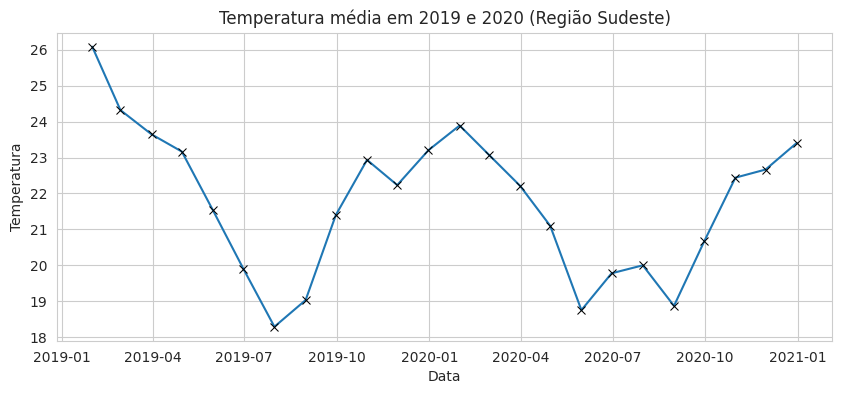

In [227]:
# resposta da questão 3.1.b
with sns.axes_style('whitegrid'):

    grafico = sns.lineplot(data=temperatura, x='referencia', y='temp-media', marker="x", markeredgecolor='black')
    grafico.set(title='Temperatura média em 2019 e 2020 (Região Sudeste)', ylabel='Temperatura', xlabel='Data')
    grafico.figure.set_size_inches(10, 4)

 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

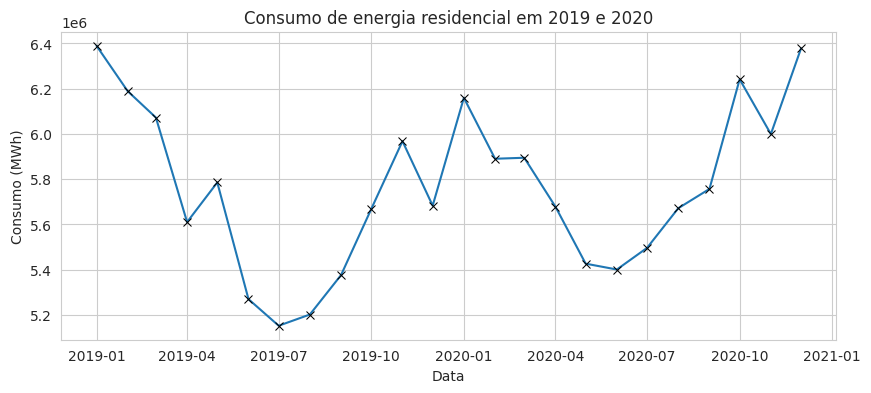

In [225]:
# resposta da questão 3.1.b
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia, x='referencia', y='residencial', marker="x", markeredgecolor='black')
  grafico.set(title='Consumo de energia residencial em 2019 e 2020', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [230]:
#verificando a correlação utilizando "scipy.stats"
x = energia['residencial']
y = temperatura['temp-media']

corr, _ = pearsonr(x, y)

print('Coeficiente de Pearson:', corr)

Coeficiente de Pearson: 0.8242718227397308


In [234]:
#verificando a correlação utilizando "numpy"
coef_pearson = np.corrcoef(energia['residencial'], temperatura['temp-media'])
print(coef_pearson)

[[1.         0.82427182]
 [0.82427182 1.        ]]


 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?

Sim, ao analisarmos os gráfico e verificarmos a correlação pelo coeficiente de Pearson, podemos afirmar que a temperatura é uma boa métrica para prever o consumo de energia residencial.

**Resposta:** ?

### **3.2. Consumo comercial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **comercial**.

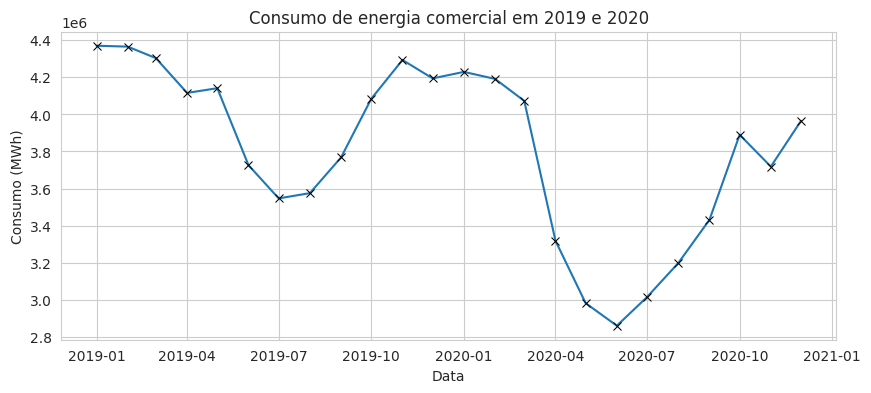

In [235]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia, x='referencia', y='comercial', marker="x", markeredgecolor='black')
  grafico.set(title='Consumo de energia comercial em 2019 e 2020', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

### **3.3. Consumo industrial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **industrial**.

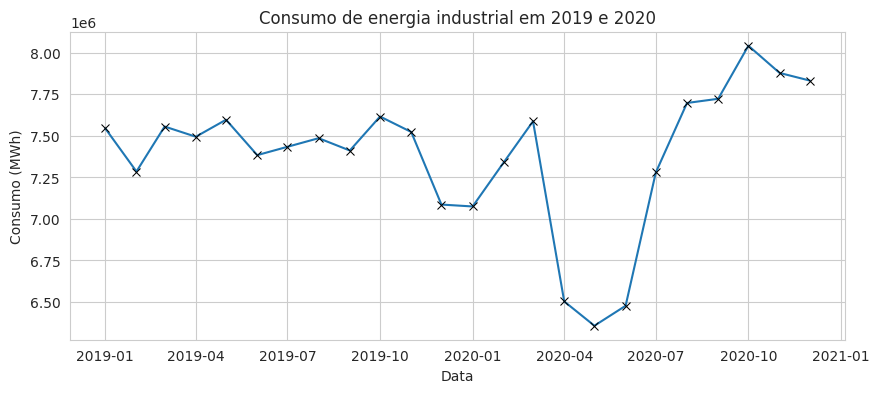

In [239]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia, x='referencia', y='industrial', marker="x", markeredgecolor='black')
  grafico.set(title='Consumo de energia industrial em 2019 e 2020', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

---